### Multiclass Classification of Digit Images Using ANN-Keras
- Image size 28*28 = 784 pixels for each image

### ANN Architecture

#### Firstly extract the pixel value of image

#### Input Layer
- 784 nodes - One node for each pixel
#### Hidden Layer
- 128 nodes in hidden layer
#### Output Layer
- 10 output nodes - as there are 10 different digits (zero to nine)

In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [5]:
(X_train,y_train),(X_test,y_test) = keras.datasets.mnist.load_data()

In [6]:
X_train.shape

(60000, 28, 28)

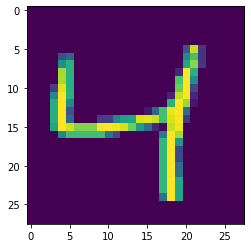

In [7]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

### Converting Each pixel value in the range of 0-1

In [10]:
X_train = X_train/255
X_test = X_test/255

In [11]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Modelling

In [12]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [15]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.2)

Epoch 1/30
1500/1500 [==============================] - 10s 6ms/step - loss: 0.2931 - accuracy: 0.9146 - val_loss: 0.1447 - val_accuracy: 0.9568
Epoch 2/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1221 - accuracy: 0.9632 - val_loss: 0.1088 - val_accuracy: 0.9670
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0838 - accuracy: 0.9747 - val_loss: 0.0927 - val_accuracy: 0.9722
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0625 - accuracy: 0.9808 - val_loss: 0.0868 - val_accuracy: 0.9743
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0490 - accuracy: 0.9849 - val_loss: 0.1011 - val_accuracy: 0.9707
Epoch 6/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0365 - accuracy: 0.9891 - val_loss: 0.0853 - val_accuracy: 0.9753
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0324 - accuracy: 0.9891 - val_loss: 0.0895 - val_accuracy

### Predictions Based on Model probabilities

In [16]:
y_prob = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [17]:
y_prob

array([[1.9428210e-18, 2.3068502e-17, 2.7829853e-17, ..., 1.0000000e+00,
        3.2204614e-16, 1.8229901e-17],
       [4.0646625e-18, 1.0826889e-17, 1.0000000e+00, ..., 5.7909821e-30,
        8.5959958e-19, 2.7953503e-31],
       [3.3082109e-12, 9.9999869e-01, 5.3982253e-11, ..., 9.2047192e-10,
        1.2446050e-06, 8.8587089e-11],
       ...,
       [8.1201687e-26, 1.1571539e-19, 7.3593135e-25, ..., 2.1153612e-15,
        2.4262138e-18, 2.3683472e-11],
       [5.1989068e-31, 1.2161057e-34, 0.0000000e+00, ..., 1.2809628e-30,
        1.3272326e-23, 1.4192695e-32],
       [4.0936128e-22, 4.5711336e-28, 4.1374906e-23, ..., 0.0000000e+00,
        1.6309911e-25, 3.4143213e-28]], dtype=float32)

In [18]:
y_prob.argmax(axis=1)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

#### Final Predictions

In [19]:
y_pred = y_prob.argmax(axis=1)

### Evaluation

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
accuracy_score(y_test,y_pred)

0.9744

### Plotting training and validation loss for overfitting check

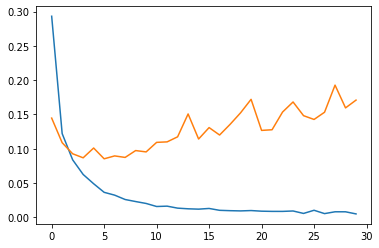

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

### Plotting Training and Validation Accuracy

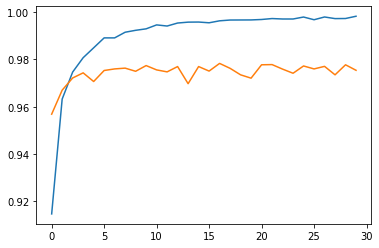

In [23]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [24]:
X_test[9]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Manually verifying the predictions

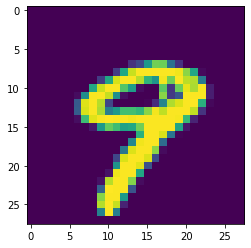

In [25]:
plt.imshow(X_test[9])

In [26]:
model.predict(X_test[9].reshape(1,28,28)).argmax(axis=1)

1/1 [==============================] - 0s 32ms/step


array([9], dtype=int64)